# Loan application status analysis and prediction

## Goal
The goal of this project is to process the loan applications dataset. I'll use data integration, data cleaning, inserting missing values, feature selection. The accuracy of logistic regression that predicts the status on application will be used as success metric. The accuracy on original dataset will be compared with accuracies after each step.

The goal of the project isn't achieving the high accuracy itself but rather preparing the dataset for further work. Accuracy is only used as progress metric.

## Motivation
Finance is a point of interest for me. That could give some insights on how the decision in loan giving institutions is made. I spent 6 hours searching for the proper dataset and this one worked the best in terms on number of examples, features and the data processing work to do. The dataset wasn't fully processed which is a perfect fit for me.

## Similar work done by other people
https://towardsdatascience.com/predicting-loan-repayment-5df4e0023e92 - mostly focuses on eliminating False Negatives
https://www.kaggle.com/hafidhfikri/loan-approval-prediction - the accuration of classification is 54.92%

## Steps
0 step: calculate the accuracy on original dataset  
1. Remove rows with empty values
2. Transform categorical data to numbers
3. Calculate accuracy

1st step: Data integration, data cleaning,  
1. inserting missing values
2. Fix errors in classes
3. Rename the columns to make names more clear
4. Replace categorical missing values with column mode (all the numerical values were present)
5. Transform categorical data to numbers
6. Calculate accuracy

Visualize the data  

2nd step: Feature selection  
1. Use the dataset from 1st step
2. Select features using sklearn.feature_selection.SelectKBest with chi2, f_classif and k=[2, 5, 10, 15, 20]
3. Calculate accuracy on each option
4. Choose the highest accuracy and list features

## Feature selection. Chosen method justification and short description
I chose SelectKBest algorithm for feature selection. it uses scoring function to choose k features that influence the column of interest the most. It's easy to use. As scoring functions I chose chi2, f_classif which work with classification problems.

After getting good improvement using this method I decided not to proceed with other methods.

## References
Dataset source - https://www.engineeringbigdata.com/datasets/  
sklearn API reference - https://scikit-learn.org/stable/modules/classes.html#api-reference

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
import timeit

## Load the data

In [67]:
data = pd.read_csv('data/credit.csv')

## Explore the data

In [68]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,yes


In [69]:
data.describe(include='all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN


In [70]:
data.shape

(1000, 16)

Will do further data exploring and visualization after transforming the data. For now quick glance is ok

## Calculate accuracy on original dataset

Calculate accuracy on dataset with minimal transformations. Will use it as starting point to track progress

In [72]:
data_bm = data

Remove rows with empty values to train logistic regression.

Let's look at unique values at each column to see what we need to change.

In [73]:
for column in data_bm:
    print(column, pd.unique(data_bm[column].values))

checking_balance ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
months_loan_duration [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
credit_history ['critical' 'good' 'poor' 'perfect' 'very good']
purpose ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
amount [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  14

checking_balance and savings_balance have 'unknown' value. Let's remove rows with these values

In [74]:
# Remove rows with empty values
data_bm = data_bm[data_bm.checking_balance != 'unknown']
data_bm = data_bm[data_bm.savings_balance != 'unknown']

Transform categorical values to numerical to prepare them for logistic regression

In [75]:
# Transform yes/no to int
data_bm.default = data_bm.default.map(dict(yes=1, no=0))

In [76]:
data_bm = pd.get_dummies(data_bm)

In [77]:
data_bm.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
1,48,5951,2,2,22,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,0,1,...,0,1,0,1,0,0,0,1,0,0
7,36,6948,2,2,35,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
9,30,5234,4,2,28,2,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0


In [78]:
data_bm.shape

(522, 41)

Shuffle the data  
Then break up into train and test. We don't need cross validation for now because we only train and calc accuracy.

In [82]:
data_bm = data_bm.sample(frac=1)
msk = np.random.rand(len(data_bm)) < 0.8

train_bm = data_bm[msk]
test_bm = data_bm[~msk]

train_bm_labels = train_bm[['default']].copy()
test_bm_labels = test_bm[['default']].copy()

train_bm = train_bm.drop('default', axis=1)
test_bm = test_bm.drop('default', axis=1)

start = timeit.default_timer()

reg_bm = linear_model.LogisticRegression(C=1e5)
reg_bm.fit(train_bm, train_bm_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg_bm.score(train_bm, train_bm_labels))
print('Test accuracy: ', reg_bm.score(test_bm, test_bm_labels))

Time:  0.004779936993145384
Train accuracy:  0.6810551558752997
Test accuracy:  0.6476190476190476


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy:  0.6476190476190476  
Save this value to track the progress 

## Process the data

Remove minor error in data 'car0' => 'car'

In [84]:
data.purpose.replace(['car0'], ['car'], inplace=True)

Rename columns to make them more clear

In [89]:
# Rename the columns to make them more clear
data = data.rename(index=str, columns={"default": "decision", "checking_balance": "account_balance", "amount": "requested_amount"})

Find purpose categorical mode

In [86]:
# Find the most popular purpose
print("The most popular purpose is: ", data.purpose.mode()[0])

The most popular purpose is:  furniture/appliances


In [90]:
data.head()

,account_balance,months_loan_duration,credit_history,purpose,requested_amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,decision
0,< 0 DM,6,critical,furniture/appliances,1169,NaN,> 7 years,4,4,67,none,own,2,skilled,1,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,yes
2,NaN,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,yes


Replace categorical values with column mode

In [91]:
# Replace categorical missing values with mode
data.replace('unknown', np.nan, inplace = True)
data = data.fillna(value={'account_balance': data.account_balance.mode()[0], 'savings_balance': data.savings_balance.mode()[0]})

In [26]:
for column in data:
    print(column, pd.unique(data[column].values))

account_balance ['< 0 DM' '1 - 200 DM' '> 200 DM']
months_loan_duration [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
credit_history ['critical' 'good' 'poor' 'perfect' 'very good']
purpose ['furniture/appliances' 'education' 'car' 'business' 'renovations']
requested_amount [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392

In [92]:
data.head()

,account_balance,months_loan_duration,credit_history,purpose,requested_amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,decision
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,yes
2,< 0 DM,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,yes


Transform categorical values to numerical

In [93]:
# Transform yes/no to int
data.decision = data.decision.map(dict(yes=1, no=0))

In [94]:
data_dummies = pd.get_dummies(data)

In [95]:
data_dummies.head()

,months_loan_duration,requested_amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,decision,account_balance_1 - 200 DM,account_balance_< 0 DM,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,6,1169,4,4,67,2,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,0,1,...,0,1,0,1,0,0,0,1,0,0


In [96]:
data_dummies = data_dummies.sample(frac=1)
msk = np.random.rand(len(data_dummies)) < 0.8

train = data_dummies[msk]
test = data_dummies[~msk]

train_labels = train[['decision']].copy()
test_labels = test[['decision']].copy()

train = train.drop('decision', axis=1)
test = test.drop('decision', axis=1)

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.007602335012052208
Train accuracy:  0.7345132743362832
Test accuracy:  0.7607655502392344


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy:  0.7607655502392344

## Visualize the data

In [97]:
# Explore the data
data.head()

,account_balance,months_loan_duration,credit_history,purpose,requested_amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,decision
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,1
2,< 0 DM,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,1


Purposes for credit

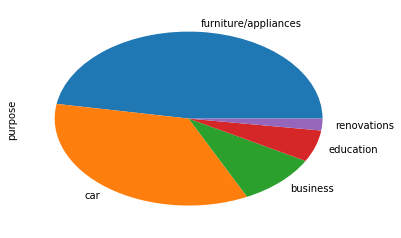

In [98]:
data.purpose.value_counts().plot(kind='pie')

Credit history

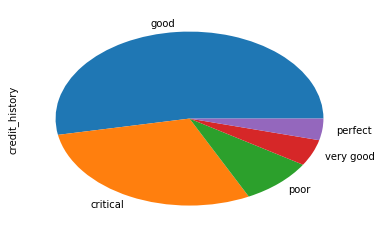

In [99]:
data.credit_history.value_counts().plot(kind='pie')

Credits approved (1) and not approved (0) by percent_of_income

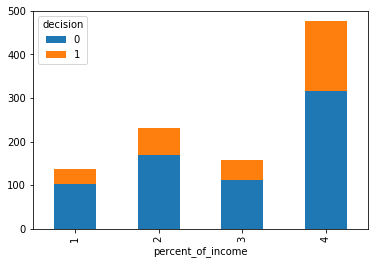

In [100]:
data.groupby(['percent_of_income','decision'])['account_balance'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

Credits approved (1) and not approved (0) by credit history

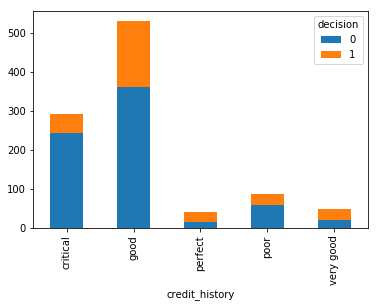

In [101]:
data.groupby(['credit_history','decision'])['account_balance'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

Credits approved (1) and not approved (0) by age

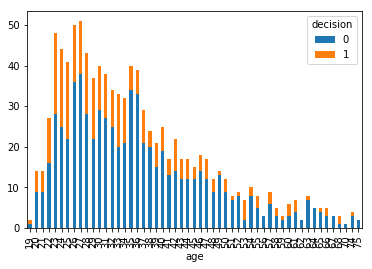

In [102]:
data.groupby(['age','decision'])['account_balance'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

## Feature selection

Select features using sklearn.feature_selection.SelectKBest with chi2, f_classif and k=\[2, 5, 10, 15, 20\]  
After that choose the one with the highest accuracy and extract features from it.  
I'll add cross validation to this step in future.  

In [103]:
data_fs = data_dummies.sample(frac=1)

data_fs_X = data_fs.drop('decision', axis=1)
data_fs_Y = data_fs[['decision']].copy()

In [104]:
data_fs_X_new = SelectKBest(chi2, k=2).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0026799510087585077
Train accuracy:  0.7066326530612245
Test accuracy:  0.7083333333333334


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
data_fs_X_new = SelectKBest(chi2, k=5).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0035592300118878484
Train accuracy:  0.7153652392947103
Test accuracy:  0.7087378640776699


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
data_fs_X_new = SelectKBest(chi2, k=7).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.004073150994372554
Train accuracy:  0.7094017094017094
Test accuracy:  0.7292817679558011


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
data_fs_X_new = SelectKBest(chi2, k=10).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.004019792992039584
Train accuracy:  0.7217391304347827
Test accuracy:  0.7282051282051282


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
data_fs_X_new = SelectKBest(chi2, k=15).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.004277857995475642
Train accuracy:  0.7284105131414268
Test accuracy:  0.7711442786069652


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
data_fs_X_new = SelectKBest(chi2, k=20).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.005251786002190784
Train accuracy:  0.745679012345679
Test accuracy:  0.7210526315789474


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Let's try different classifier

In [110]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=2).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0021662420040229335
Train accuracy:  0.7055214723926381
Test accuracy:  0.7135135135135136


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=5).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.003153609999571927
Train accuracy:  0.7207317073170731
Test accuracy:  0.7


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=7).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0032608170004095882
Train accuracy:  0.730958230958231
Test accuracy:  0.6989247311827957


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=10).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0032595280063105747
Train accuracy:  0.724907063197026
Test accuracy:  0.7202072538860104


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=15).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.004342022992204875
Train accuracy:  0.7408343868520859
Test accuracy:  0.69377990430622


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
data_fs_X_new = SelectKBest(score_func=f_classif, k=20).fit_transform(data_fs_X, data_fs_Y)

msk = np.random.rand(len(data_fs_X_new)) < 0.8

train = data_fs_X_new[msk]
train_labels = data_fs_Y[msk]
test = data_fs_X_new[~msk]
test_labels = data_fs_Y[~msk]

start = timeit.default_timer()

reg = linear_model.LogisticRegression(C=1e5)
reg.fit(train, train_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)
print('Train accuracy: ', reg.score(train, train_labels))
print('Test accuracy: ', reg.score(test, test_labels))

Time:  0.0054870280000614
Train accuracy:  0.7413793103448276
Test accuracy:  0.7180851063829787


/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Got the best result with **chi2, k=15**. Let's find out what are the features there

In [116]:
selector = SelectKBest(chi2, k=15)
data_fs_X_new = selector.fit_transform(data_fs_X, data_fs_Y)

mask = selector.get_support()
feature_names = list(data_fs_X.columns.values)
new_features = []

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

These are the features that mostly effected the status

In [117]:
new_features

['months_loan_duration',
 'requested_amount',
 'age',
 'account_balance_1 - 200 DM',
 'credit_history_critical',
 'credit_history_perfect',
 'credit_history_very good',
 'savings_balance_500 - 1000 DM',
 'savings_balance_> 1000 DM',
 'employment_duration_4 - 7 years',
 'employment_duration_< 1 year',
 'other_credit_bank',
 'housing_other',
 'housing_own',
 'housing_rent']

In [118]:
data_dummies.to_csv('data/final.csv')

## Conclusions

The accuracy on original dataset was 0.65

After **data integration, data cleaning, inserting missing values** it increased to 0.73

Using **feature selection** increased it to 0.77

Features that mostly effected the status
```
['months_loan_duration',
 'requested_amount',
 'age',
 'account_balance_1 - 200 DM',
 'credit_history_critical',
 'credit_history_perfect',
 'credit_history_very good',
 'savings_balance_500 - 1000 DM',
 'savings_balance_> 1000 DM',
 'employment_duration_4 - 7 years',
 'employment_duration_< 1 year',
 'other_credit_bank',
 'housing_other',
 'housing_own',
 'housing_rent']
```

After getting good improvement using SelectKBest method I decided not to proceed with other feature selection methods.

In summary using data clean up, inserting missing values and feature selection increased the accuracy on this data by 12% which is great result for classification problem like this.